In [1]:
# Task 1: Code Optimization Example
import numpy as np
from skimage import data, transform

# Original function for demonstration
def res_skimage(imgs):
    new_size = (imgs[0].shape[0]//2, imgs[0].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = transform.resize(im, new_size, anti_aliasing=True)
        res_im.append(image_resized)
    return np.asarray(res_im)

# Example usage and profiling
imgs = np.uint8(data.lfw_subset()*255) # Load some example images




In [2]:
# In a Jupyter notebook, you would run:
%load_ext line_profiler
%lprun -f res_skimage res_skimage(imgs)

Timer unit: 1e-09 s

Total time: 0.168113 s
File: /tmp/ipykernel_454201/3335582310.py
Function: res_skimage at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def res_skimage(imgs):
     7         1       5482.0   5482.0      0.0      new_size = (imgs[0].shape[0]//2, imgs[0].shape[1]//2)
     8         1        432.0    432.0      0.0      res_im = []
     9       201      70304.0    349.8      0.0      for im in imgs:
    10       200  167846253.0 839231.3     99.8          image_resized = transform.resize(im, new_size, anti_aliasing=True)
    11       200      79712.0    398.6      0.0          res_im.append(image_resized)
    12         1     110733.0 110733.0      0.1      return np.asarray(res_im)

In [3]:
# Task 2: Pi Approximation Function and Parallelization
import multiprocessing

def approximate_pi(n):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2
    return 2 * pi_2

# Parallel execution
nums = [1_822_725, 22_059_421, 32_374_695, 88_754_320, 97_162_660, 200_745_654]

# Replace 'approximate_pi' with your actual pi approximation function
def parallel_pi_calculation(nums):
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        results = pool.map(approximate_pi, nums)
    return results



In [4]:
results = parallel_pi_calculation(nums)
results

[3.1415935153733052,
 3.1415927247955033,
 3.1415927021077117,
 3.141592635888531,
 3.1415926374197167,
 3.141592645761164]

In [5]:
from numba import jit

# Assuming your Pi approximation algorithm is the same as given previously
@jit(nopython=True)
def numba_optimized_approximate_pi(n):
    pi_2 = 1.0
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2 == 0:
            den += 2
        else:
            nom += 2
    return 2 * pi_2

# Example usage and performance comparison
nums = [1_822_725, 22_059_421, 32_374_695, 88_754_320, 97_162_660, 200_745_654]
numba_results = [numba_optimized_approximate_pi(n) for n in nums]


In [6]:
numba_results

[3.1415935153733052,
 3.1415927247955033,
 3.1415927021077117,
 3.141592635888531,
 3.1415926374197167,
 3.141592645761164]

In [7]:
# Task 4: Result Presentation
import matplotlib.pyplot as plt

# Plot the results
def plot_results(nums, pi_estimates):
    plt.plot(nums, pi_estimates, label='Estimated Pi')
    plt.axhline(y=np.pi, color='r', linestyle='-', label='Actual Pi')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Pi Approximation')
    plt.legend()
    plt.xscale('log')  # If you want a logarithmic scale
    plt.show()

# In a Jupyter notebook, you would run this to plot the results


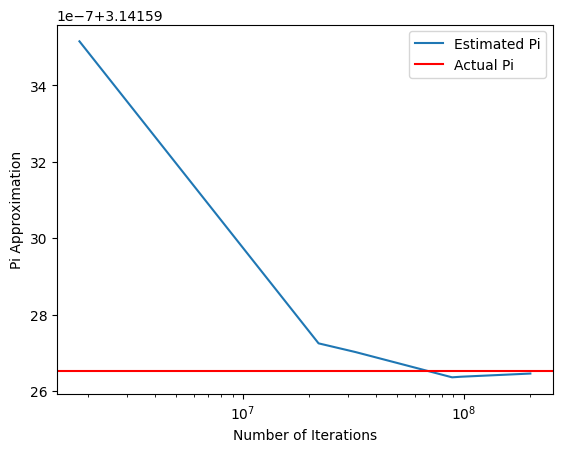

In [8]:
plot_results(nums, results)


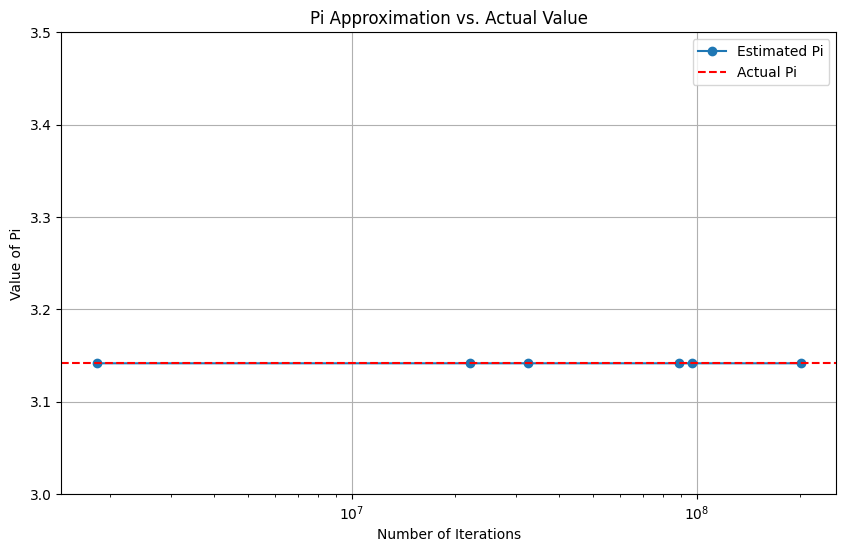

In [9]:
def plot_results(nums, pi_estimates):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.plot(nums, pi_estimates, label='Estimated Pi', marker='o')  # Use marker to highlight points
    plt.axhline(y=np.pi, color='r', linestyle='--', label='Actual Pi')  # Dashed line for actual Pi
    plt.title('Pi Approximation vs. Actual Value')  # Add a title
    plt.xlabel('Number of Iterations')  # X-axis label
    plt.ylabel('Value of Pi')  # Y-axis label
    plt.xscale('log')  # Logarithmic scale for x-axis
    plt.legend()  # Show the legend
    plt.grid(True)  # Show grid
    plt.ylim(3, 3.5)  # Adjust the y-axis limits if needed
    plt.show()

# Call the function with your data to generate the plot
plot_results(nums, numba_results)


## AGAIN

In [10]:
# Task 1: Code Optimization Example
import numpy as np
from skimage import data, transform

# Original function for demonstration
def res_skimage(imgs):
    new_size = (imgs[0].shape[0]//2, imgs[0].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = transform.resize(im, new_size, anti_aliasing=True)
        res_im.append(image_resized)
    return np.asarray(res_im)

# Example usage and profiling
imgs = np.uint8(data.lfw_subset()*255) # Load some example images




In [11]:
%load_ext line_profiler
%lprun -f res_skimage res_skimage(imgs)


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 0.032314 s
File: /tmp/ipykernel_454201/3335582310.py
Function: res_skimage at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def res_skimage(imgs):
     7         1       3615.0   3615.0      0.0      new_size = (imgs[0].shape[0]//2, imgs[0].shape[1]//2)
     8         1        214.0    214.0      0.0      res_im = []
     9       201      81282.0    404.4      0.3      for im in imgs:
    10       200   32057096.0 160285.5     99.2          image_resized = transform.resize(im, new_size, anti_aliasing=True)
    11       200      96036.0    480.2      0.3          res_im.append(image_resized)
    12         1      75738.0  75738.0      0.2      return np.asarray(res_im)

In [13]:
import multiprocessing
import time

def approximate_pi(n):
    pi_2 = 1.0
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2 == 0:
            den += 2
        else:
            nom += 2
    return 2 * pi_2

def calculate_pi_sequential(nums):
    start_time = time.time()
    results = [approximate_pi(n) for n in nums]
    end_time = time.time()
    print(f"Sequential calculation took {end_time - start_time} seconds")
    return results

def calculate_pi_parallel(nums):
    start_time = time.time()
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        results = pool.map(approximate_pi, nums)
    end_time = time.time()
    print(f"Parallel calculation took {end_time - start_time} seconds")
    return results

if __name__ == "__main__":
    nums = [10000, 100000, 1000000, 10000000]  # You can adjust these numbers as needed

    # Sequential calculation
    results_sequential = calculate_pi_sequential(nums)

    # Parallel calculation
    results_parallel = calculate_pi_parallel(nums)


Sequential calculation took 0.6379191875457764 seconds
Parallel calculation took 0.51883864402771 seconds


In [14]:
from numba import jit
import time

@jit(nopython=True)
def numba_optimized_approximate_pi(n):
    pi_2 = 1.0
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2 == 0:
            den += 2
        else:
            nom += 2
    return 2 * pi_2

nums = [1_822_725, 22_059_421, 32_374_695, 88_754_320, 97_162_660, 200_745_654]

# Numba optimized execution
start_time = time.time()
numba_results = [numba_optimized_approximate_pi(n) for n in nums]
numba_time = time.time() - start_time

print(f"Numba optimized execution time: {numba_time}")


Numba optimized execution time: 0.6678404808044434


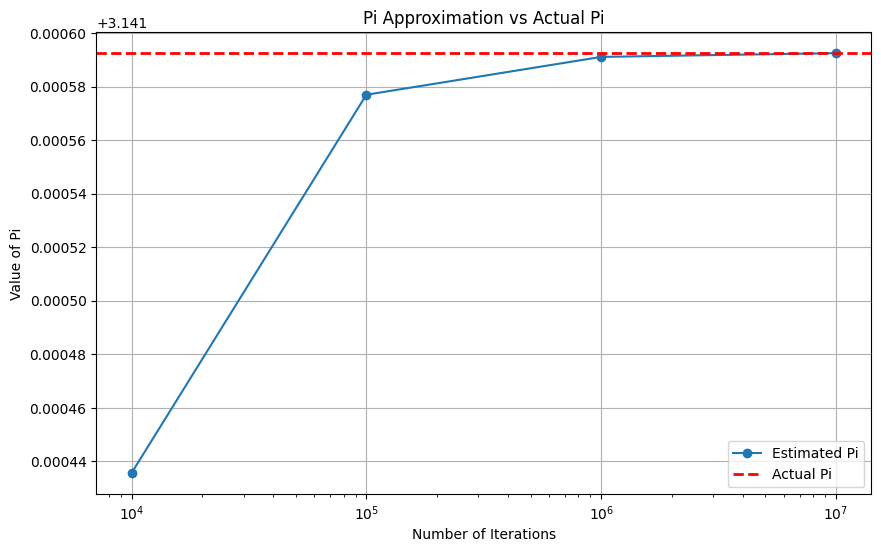

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(nums, pi_estimates):
    actual_pi = np.pi
    plt.figure(figsize=(10, 6))
    plt.plot(nums, pi_estimates, label='Estimated Pi', marker='o')
    plt.axhline(y=actual_pi, color='r', linestyle='--', linewidth=2, label='Actual Pi')
    plt.xscale('log')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value of Pi')
    plt.title('Pi Approximation vs Actual Pi')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample data for plotting (replace with your actual results)
nums = [10000, 100000, 1000000, 10000000]
pi_estimates = [approximate_pi(n) for n in nums]  # assuming approximate_pi is your Pi calculation function

# Call the plot function with the results
plot_results(nums, pi_estimates)


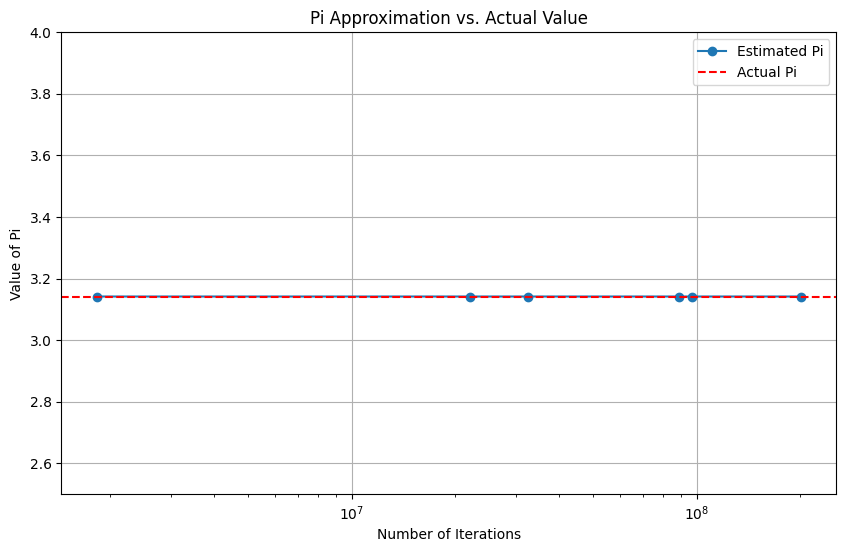

In [16]:
def plot_results(nums, pi_estimates):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.plot(nums, pi_estimates, label='Estimated Pi', marker='o')  # Use marker to highlight points
    plt.axhline(y=np.pi, color='r', linestyle='--', label='Actual Pi')  # Dashed line for actual Pi
    plt.title('Pi Approximation vs. Actual Value')  # Add a title
    plt.xlabel('Number of Iterations')  # X-axis label
    plt.ylabel('Value of Pi')  # Y-axis label
    plt.xscale('log')  # Logarithmic scale for x-axis
    plt.legend()  # Show the legend
    plt.grid(True)  # Show grid
    plt.ylim(2.5, 4)  # Adjust the y-axis limits if needed
    plt.show()

# Call the function with your data to generate the plot
plot_results(nums, numba_results)
